# LOGISTIC REGRESSION

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

## Analisis (EDA)

### Paso 1, Planteamiento del problema y recopilación de datos

El banco portugués está teniendo una disminución en sus ingresos, por lo que quieren poder identificar a los clientes existentes que tienen una mayor probabilidad de contratar un depósito a largo plazo. Esto permitirá que el banco centre sus esfuerzos de marketing en esos clientes y evitará perder dinero y tiempo en clientes que probablemente no se suscribirán.

Para abordar este problema crearemos un algoritmo de clasificación que ayude a predecir si un cliente contratará o no un depósito a largo plazo.

In [13]:
data = '../data/raw/bank-marketing-campaign-data.csv'

df = pd.read_csv(data, sep=';')

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Buscamos variables nulas o columnas irrelevantes o con poca variacion


In [14]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000



    age. Edad del cliente (numérico)
    job. Tipo de trabajo (categórico)
    marital. Estado civil (categórico)
    education. Nivel de educación (categórico)
    default. ¿Tiene crédito actualmente? (categórico)
    housing. ¿Tiene un préstamo de vivienda? (categórico)
    loan. ¿Tiene un préstamo personal? (categórico)
    contact. Tipo de comunicación de contacto (categórico)
    month. Último mes en el que se le ha contactado (categórico)
    day_of_week. Último día en el que se le ha contactado (categórico)
    duration. Duración del contacto previo en segundos (numérico)
    campaign. Número de contactos realizados durante esta campaña al cliente (numérico)
    pdays. Número de días que transcurrieron desde la última campaña hasta que fue contactado (numérico)
    previous. Número de contactos realizados durante la campaña anterior al cliente (numérico)
    poutcome. Resultado de la campaña de marketing anterior (categórico)
    emp.var.rate. Tasa de variación del empleo. Indicador trimestral (numérico)
    cons.price.idx. Índice de precios al consumidor. Indicador mensual (numérico)
    cons.conf.idx. Índice de confianza del consumidor. Indicador mensual (numérico)
    euribor3m. Tasa EURIBOR 3 meses. Indicador diario (numérico)
    nr.employed. Número de empleados. Indicador trimestral (numérico)
    y. TARGET. El cliente contrata un depósito a largo plazo o no (categórico)


Tenemos 41188 filas y 21 columnas, suficiente informacion para poder entrenar un modelo, no hay valores nulos y hay distintos tipos de variables

La variable `duration` no debe usarse para predecir si alguien acepta o no el producto pues solo se puede saber ddespues de llamar al cliente.

La variable `pdays` tiene un valor de 999 lo cual no puede ser real, debe ser que los clientes con dia 999 nunca han sido contactados asi que sera necesario cambiarla

In [15]:
df['was_previously_contacted'] = (df['pdays'] != 999).astype(int)

df['was_previously_contacted']

0        0
1        0
2        0
3        0
4        0
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: was_previously_contacted, Length: 41188, dtype: int64

Creamos la columna `was_previously_contacted` con valores booleanos representando si ha sido contactado o no en base a si es distinto del valor estandar '999'

### Paso 3: Analizar la variable objetivo Y

Analizamos la distribucion de la variable objetivo

In [16]:
conteo_y = (df['y'].value_counts())
porcentaje_y =(df['y'].value_counts(normalize=True) * 100)

conteo_y, porcentaje_y

(y
 no     36548
 yes     4640
 Name: count, dtype: int64,
 y
 no     88.734583
 yes    11.265417
 Name: proportion, dtype: float64)

Como podemos ver, el dataset esta muy desbalanceado, solo un 11% ha contratado el servicio, lo cual es un problema puesto que nuestro modelo si no modificamos nada podría predecir "no" el 100% del tiempo y seguir siendo bastante preciso

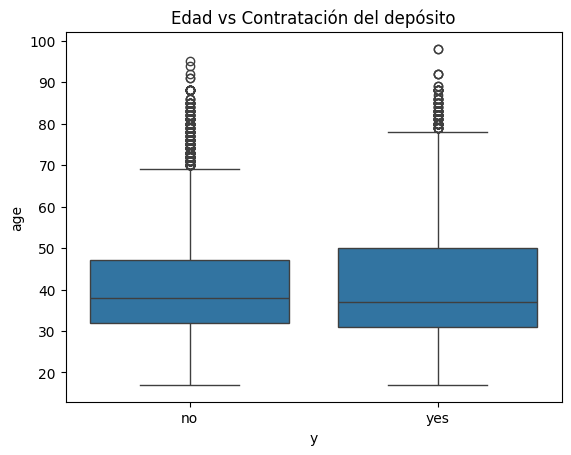

In [17]:
sns.boxplot(x='y', y='age', data=df)
plt.title('Edad vs Contratación del depósito')
plt.show()

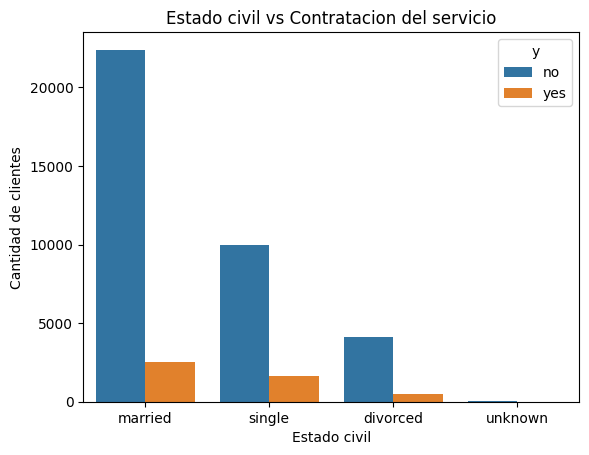

In [22]:
sns.countplot(x='marital', hue='y', data=df)
plt.title('Estado civil vs Contratacion del servicio')
plt.xlabel('Estado civil')
plt.ylabel('Cantidad de clientes')
plt.show()

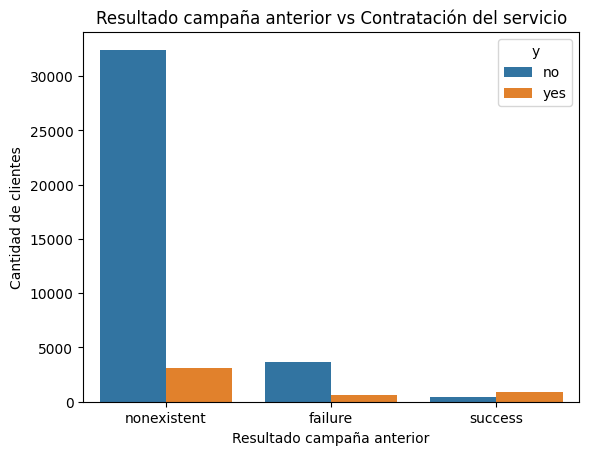

In [24]:
sns.countplot(x='poutcome', hue='y', data=df)
plt.title('Resultado campaña anterior vs Contratación del servicio')
plt.xlabel('Resultado campaña anterior')
plt.ylabel('Cantidad de clientes')
plt.show()

### MODELO 

In [29]:
df_model = df.copy()


cat_cols = df_model.select_dtypes(include='object').columns

le = LabelEncoder()
for col in cat_cols:
    df_model[col] = le.fit_transform(df_model[col])


X = df_model.drop('y', axis=1)
y = df_model['y']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


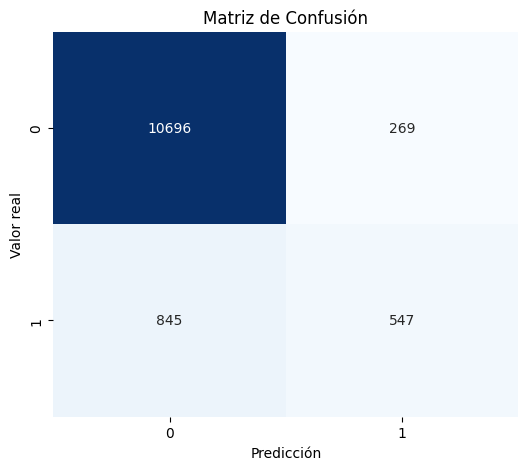

In [30]:

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión')
plt.show()